#  Lungs Disease Dataset – 4 Types

The **Lungs Disease Dataset** is a curated collection of chest X-ray images categorized into four major lung condition classes.  
It is designed for **machine learning** and **deep learning** research in disease classification, detection, and diagnosis.

---

## Dataset Composition

| Class ID | Class Name               | Description |
|----------|--------------------------|-------------|
| 1        | **Bacterial Pneumonia**   | X-ray images showing bacterial infection in the lungs. |
| 2        | **Viral Pneumonia**       | X-ray images with viral lung infection (excluding COVID-19). |
| 3        | **Corona Virus Disease**  | X-ray images of COVID-19 patients. |
| 4        | **Normal**                | X-ray images of healthy individuals. |

---

##  Data Characteristics
- **Image Type:** Chest X-ray (radiographic)
- **Format:** JPEG
- **Color Mode:** Grayscale
- **Classes:** 4 (multi-class classification)
- **Labeling:** Images are stored in folders named after their class label
- **Image Size:** Standardized resolution for model input consistency
- **Dataset Splits:** Organized into `train`, `validation`, and `test` folders

---

## Intended Use & Applications
- Building **automated diagnostic models**
- Developing medical AI **decision support systems**
- **Educational and training** purposes in radiology and AI

---

##  Ethical Note
This dataset is for **research and educational purposes only**.  
It must **not** be used for real-world clinical decision-making without professional medical supervision.

---

##  Key Benefits
- Well-structured multi-class dataset
- High-quality chest X-ray images
- Ready-to-use for both beginners and advanced AI research workflows


# <span style="color:#FF6B6B;">Downloading and Extracting the Dataset </span>


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rehabelsayed","key":"5eaecfa1c1ac4b7d59b1562f3e224654"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkarmanohardalvi/lungs-disease-dataset-4-types

Dataset URL: https://www.kaggle.com/datasets/omkarmanohardalvi/lungs-disease-dataset-4-types
License(s): unknown
 99% 2.00G/2.02G [00:13<00:00, 259MB/s]
100% 2.02G/2.02G [00:13<00:00, 160MB/s]


In [ ]:
!unzip lungs-disease-dataset-4-types.zip

Streaming output truncated to the last 5000 lines.
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0673-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0675-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0678-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0680-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0682-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0683-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0684-0001-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0686-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0690-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0692-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0693-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0695-0001.jpeg  
  inflating: Lung Disease Dataset/train/Norm

#  **Dataset Status Report**

---

###  **General Quality**
- **Condition:** Good   
- **Balance:** Well-balanced

---

###  **Image Details**
- All images have **similar appearance**.
- **Uniform size** and **same pixel dimensions**.  
- **Clean dataset** with no unwanted noise.

---

### **Preprocessing**
- Dataset is **cleaned** and **ready** for model training .

---


In [ ]:
import os

# Step 1: Define the dataset path
data_path = '/content/Lung Disease Dataset'  # Make sure this path is correct

# Step 2: Map set names to display labels
set_labels = {
    'train': 'Training Images',
    'test': 'Testing Images'
}

# Step 3: Loop through each set and count images per class
for set_name, display_label in set_labels.items():
    set_dir = os.path.join(data_path, set_name)  # Path to train/validation/test
    if not os.path.exists(set_dir):
        print(f"{display_label} folder not found, skipping...")
        continue

    categories = os.listdir(set_dir)  # All class folders
    img_count = {}

    for category in categories:
        category_path = os.path.join(set_dir, category)
        if os.path.isdir(category_path):  # Ensure it's a folder
            img_count[category] = len(os.listdir(category_path))

    # Step 4: Print results
    total_imgs = sum(img_count.values())
    print(f"\n{display_label}:")
    print(f"Total: {total_imgs} images")
    for category, count in img_count.items():
        print(f" - {category}: {count} images")



Training Images:
Total: 6054 images
 - Viral Pneumonia: 1204 images
 - Bacterial Pneumonia: 1205 images
 - Tuberculosis: 1220 images
 - Normal: 1207 images
 - Corona Virus Disease: 1218 images

Testing Images:
Total: 2025 images
 - Viral Pneumonia: 403 images
 - Bacterial Pneumonia: 403 images
 - Tuberculosis: 408 images
 - Normal: 404 images
 - Corona Virus Disease: 407 images


In [ ]:
import os

data_path = "/content/Lung Disease Dataset/train"
print(os.listdir(data_path))


['Viral Pneumonia', 'Bacterial Pneumonia', 'Tuberculosis', 'Normal', 'Corona Virus Disease']


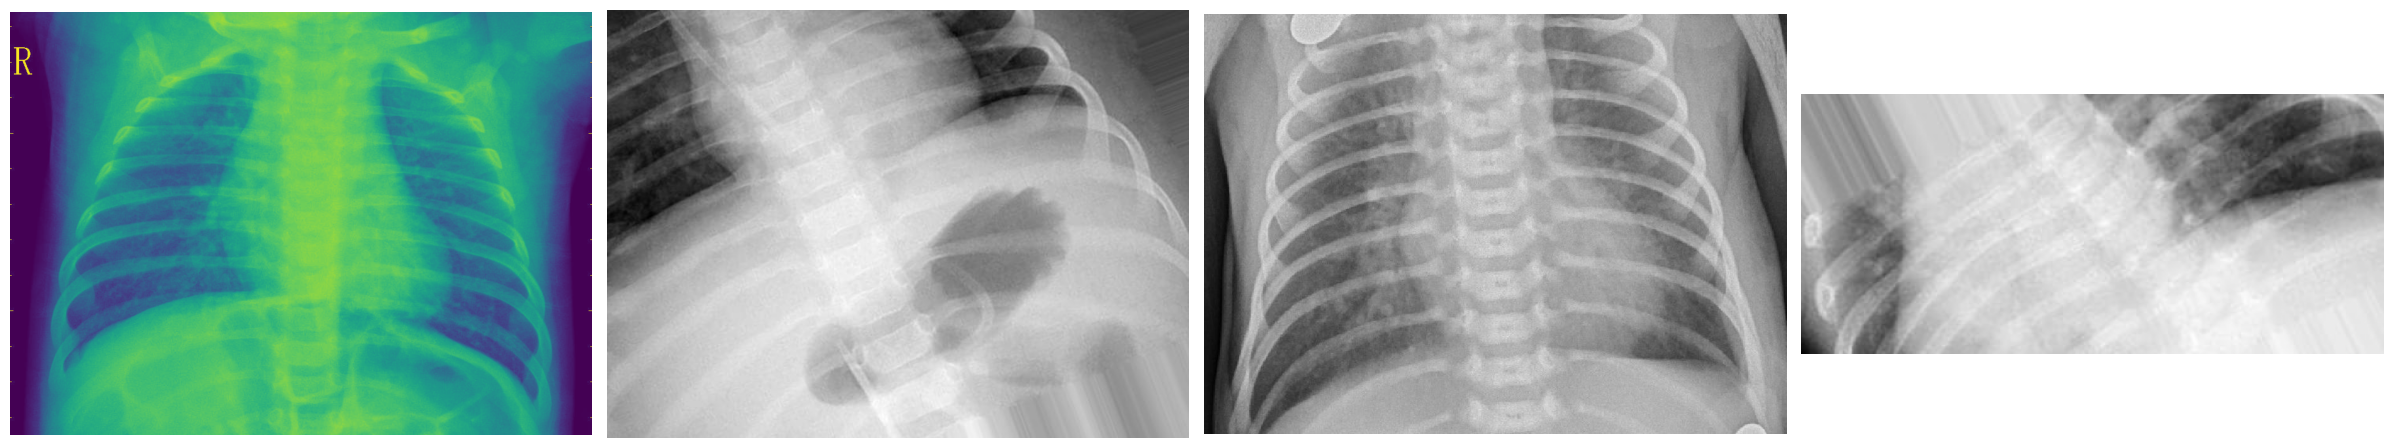

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Show some images from one category
category = 'Viral Pneumonia'
category_path = os.path.join(data_path, category)

plt.figure(figsize=(30,15))
for i, img_name in enumerate(os.listdir(category_path)[:4]):
    img_path = os.path.join(category_path, img_name)
    img = plt.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import os

sizes = []
for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                with Image.open(img_path) as img:
                    sizes.append(img.size)
            except Exception as e:
                print(f"Error opening image {img_path}: {e}")


print("Example sizes:", sizes[:10])

Example sizes: [(1024, 744), (738, 543), (928, 670), (445, 199), (1432, 816), (1160, 752), (1746, 1523), (1376, 968), (1016, 656), (1960, 1416)]


In [ ]:
import os
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import json
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings("ignore")


In [ ]:
BATCH_SIZE = 16
IMG_SIZE = 299  # Required for InceptionV3
NUM_CLASSES = 5
EPOCHS = 10
LEARNING_RATE = 1e-4

In [ ]:
transform = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
    tf.keras.layers.Normalization(mean=[0.485, 0.456, 0.406], variance=[0.229**2, 0.224**2, 0.225**2])
])

In [ ]:
# Load the InceptionV3 model with pre-trained weights (ImageNet)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for classification
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,906,085 (91.19 MB)

 Trainable params: 2,103,301 (8.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
train_dir = 'C:\\Users\\Rehab\\Documents\\datasets\\train'
train_dir = '/content/Lung Disease Dataset/train'  # Replace with the actual path

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # or 'binary', depending on your labels
)


In [ ]:
#import os
#for root, dirs, files in os.walk('/content/Lung Disease Dataset'):
 #   level = root.replace('/content/Lung Disease Dataset', '').count(os.sep)
  #  indent = ' ' * 4 * (level)
   # print(f'{indent}{os.path.basename(root)}/')
    #subindent = ' ' * 4 * (level + 1)
    #for d in dirs:
      #  print(f'{subindent}{d}/')
    #if#level < 2: # Limit the depth to avoid excessive output
        #for f in files:
         #   print(f'{subindent}{f}')

In [ ]:
train_dir = "/content/Lung Disease Dataset/train"
val_dir   = "/content/Lung Disease Dataset/val"
test_dir  = "/content/Lung Disease Dataset/test"

for p in [train_dir, val_dir, test_dir]:
    print(p, "->", "OK" if os.path.exists(p) else "NOT FOUND")


/content/Lung Disease Dataset/train -> OK
/content/Lung Disease Dataset/val -> OK
/content/Lung Disease Dataset/test -> OK


In [ ]:
import os
print("Folders in /content:", os.listdir("/content"))


Folders in /content: ['.config', 'lungs-disease-dataset-4-types.zip', 'Lung Disease Dataset', 'kaggle.json', 'sample_data']


In [ ]:
print("Subfolders in Lung Disease Dataset:", os.listdir("/content/Lung Disease Dataset"))


Subfolders in Lung Disease Dataset: ['val', 'train', 'test']


In [ ]:
ROOT_DIR = "/content/Lung Disease Dataset"  # or whatever path contains 'train' and 'test'


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.inception_v3 import preprocess_input

# لو لسه ما عرفتش المتغيرات دي
IMG_SIZE = 299  # InceptionV3 الأفضل 299x299
BATCH_SIZE = 32
SEED = 1337

# غيّر ده لمسار المجلد اللي جواه مجلدات الفئات مباشرة
# مثال شائع: "/content/Lung Disease Dataset" أو "/content/dataset"
ROOT_DIR = "/content/Lung Disease Dataset"  # Corrected path based on previous checks

# خطوة مساعدة: اتأكد إن المسار صح
print("Root exists?", os.path.exists(ROOT_DIR))
print("Subfolders:", os.listdir(ROOT_DIR) if os.path.exists(ROOT_DIR) else "ROOT_DIR not found")

# إنشاء داتا التدريب والتحقق بتقسيم داخلي (20% للتحقق)
train_ds = image_dataset_from_directory(
    os.path.join(ROOT_DIR, 'train'), # Pointing directly to the train directory
    validation_split=0.2, # This will split the train directory data
    subset="training",
    seed=SEED,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

# Get class names right after creating the dataset
class_names = train_ds.class_names
print("Classes:", class_names)
NUM_CLASSES = len(class_names)


val_ds = image_dataset_from_directory(
    os.path.join(ROOT_DIR, 'train'), # Pointing directly to the train directory
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

# If you have a separate test folder, use it like this:
test_dir = os.path.join(ROOT_DIR, "test") # Pointing directly to the test directory
if os.path.exists(test_dir):
    test_ds = image_dataset_from_directory(
        test_dir,
        image_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=False # Keep data in order for evaluation metrics later
    )
    # Note: class_names from train_ds should apply to test_ds as well

# Preprocessing المناسب لـ InceptionV3 (يحّول لمدى [-1, 1])
def preprocess(images, labels):
    return preprocess_input(images), labels

train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_ds   = val_ds.map(preprocess,   num_parallel_calls=tf.data.AUTOTUNE)

# Apply preprocessing to test_ds if it exists
if 'test_ds' in locals():
    test_ds = test_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)


# تحسين الأداء
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds   = val_ds.prefetch(tf.data.AUTOTUNE)

# Prefetch test_ds if it exists
if 'test_ds' in locals():
    test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

Root exists? True
Subfolders: ['val', 'train', 'test']
Found 6054 files belonging to 5 classes.
Using 4844 files for training.
Classes: ['Bacterial Pneumonia', 'Corona Virus Disease', 'Normal', 'Tuberculosis', 'Viral Pneumonia']
Found 6054 files belonging to 5 classes.
Using 1210 files for validation.
Found 2025 files belonging to 5 classes.


In [ ]:
print("Root exists?", os.path.exists(ROOT_DIR))
print("Subfolders:", os.listdir(ROOT_DIR))


Root exists? True
Subfolders: ['val', 'train', 'test']


In [ ]:
train_ds = image_dataset_from_directory(
    os.path.join(ROOT_DIR, 'train'),
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = image_dataset_from_directory(
    os.path.join(ROOT_DIR, 'train'),
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

# Optional: Load test dataset if it exists
test_dir = os.path.join(ROOT_DIR, "test")
if os.path.exists(test_dir):
    test_ds = image_dataset_from_directory(
        test_dir,
        image_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        shuffle=False
    )


Found 6054 files belonging to 5 classes.
Using 4844 files for training.
Found 6054 files belonging to 5 classes.
Using 1210 files for validation.
Found 2025 files belonging to 5 classes.


In [ ]:
def preprocess(images, labels):
    return preprocess_input(images), labels

train_ds = train_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_ds   = val_ds.map(preprocess,   num_parallel_calls=tf.data.AUTOTUNE)

if 'test_ds' in locals():
    test_ds = test_ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)


In [ ]:
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds   = val_ds.prefetch(tf.data.AUTOTUNE)

if 'test_ds' in locals():
    test_ds = test_ds.prefetch(tf.data.AUTOTUNE)


In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

# Load InceptionV3 base model without the top classification layer
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# Freeze the base model to retain pre-trained weights
base_model.trainable = False

# Build the custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),  # Helps reduce overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(NUM_CLASSES, activation='softmax')  # Use 'sigmoid' if binary classification
])


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',  # or 'binary_crossentropy' if binary
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
)

Epoch 1/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 1382s 9s/step - accuracy: 0.4212 - loss: 1.3686 - val_accuracy: 0.7240 - val_loss: 0.7141
Epoch 2/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 1310s 9s/step - accuracy: 0.6816 - loss: 0.7933 - val_accuracy: 0.7752 - val_loss: 0.5793
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 1304s 9s/step - accuracy: 0.7381 - loss: 0.6583 - val_accuracy: 0.7835 - val_loss: 0.5294
Epoch 4/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 1299s 9s/step - accuracy: 0.7433 - loss: 0.6025 - val_accuracy: 0.7851 - val_loss: 0.5332
Epoch 5/50
  8/152 ━━━━━━━━━━━━━━━━━━━━ 16:30 7s/step - accuracy: 0.7468 - loss: 0.5856

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get true labels and predictions
y_true = np.concatenate([y for x, y in val_loss], axis=0)
y_pred = model.predict(val_loss)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes))


In [ ]:
import matplotlib.pyplot as plt

# Get misclassified indices
misclassified = np.where(y_pred_classes != y_true)[0]

# Visualize a few
for i in misclassified[:5]:
    image, label = list(val_ds)[i]
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(f"True: {label}, Pred: {y_pred_classes[i]}")
    plt.axis('off')
    plt.show()


In [ ]:
if 'test_ds' in locals():
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_acc:.2%}")


In [ ]:
# Get true labels and predictions for the validation set
y_true_val = np.concatenate([y for x, y in val_ds], axis=0)
y_pred_val = model.predict(val_ds)
y_pred_classes_val = np.argmax(y_pred_val, axis=1)

# Generate and print the classification report
print(classification_report(y_true_val, y_pred_classes_val))

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get true labels and predictions for the validation set
y_true_val = np.concatenate([y for x, y in val_ds], axis=0)
y_pred_val = model.predict(val_ds)
y_pred_classes_val = np.argmax(y_pred_val, axis=1)

# Generate and print the classification report
print(classification_report(y_true_val, y_pred_classes_val))